# Climate Change - Exploratory Data Analysis

> In this notebook, we are going to **explore, clean and manupilate datasets** that will be used to **create visualizations** using open dataset on **climate change**.

An attempt will be made to answer the following questions:
1. What is climate change and its consequences?
2. Who is responsible for the CO2 emissions?
3. How can we reduce CO2 emissions?

## Load Libraries

In [7]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pathlib
import os
import datetime

# This module provides a progress bar when dealing with loops.
try:
    from tqdm import tqdm
except ModuleNotFoundError:
    !pip install tqdm --quiet
    from tqdm import tqdm

## What is climate change and its consequences?
* How humans are creating an imbalance Earth’s ecosystems, causing: 
    - A rise in global temperatures 
    - Melting of glaciers
    - Rise in sea levels 
    - Rise in natural disasters 
* Talk about the deaths due to natural disasters over the past. 
* Mention the rise in sea levels and reduction in the size of the glaciers. 

* What is causing the change in global temperatures? 
    - Rise in Greenhouse gases that trap the heat coming from the sun into the earth’s atmosphere. 
    - CO2 emissions being the primary driver of climate change. 
    - Talk about how human activities is responsible for the rise in global temperatures.

### Loading Data
The following datasets will be used:
1. Global Temperatures (`Berkley Land-Ocean Temperature Anomaly.csv`)
2. Glaciar Data

In [24]:
# Defining the directory that contains all datasets
data_dir = pathlib.Path("../data")

# Check if directory exists
if not data_dir.exists():
    raise FileNotFoundError(f"No data directory named {data_dir} found.")

# Defining datasets
datasets = {
    "Temperature Anomaly": data_dir / "temperature-anomaly.csv"
}

# Check if all the datasets exist
for dataset_name, path in datasets.items():
    if not path.exists():
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")
    else:
        print(f"{dataset_name} Dataset Found.")

Temperature Anomaly Dataset Found.


In [25]:
global_temp_df = pd.read_csv(datasets["Temperature Anomaly"], index_col=["Year"])
global_temp_df.head()

,Entity,Code,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
Year,,,,,
1850,Global,NaN,-0.373,-0.339,-0.425
1851,Global,NaN,-0.218,-0.184,-0.274
1852,Global,NaN,-0.228,-0.196,-0.280
1853,Global,NaN,-0.269,-0.239,-0.321
1854,Global,NaN,-0.248,-0.218,-0.301


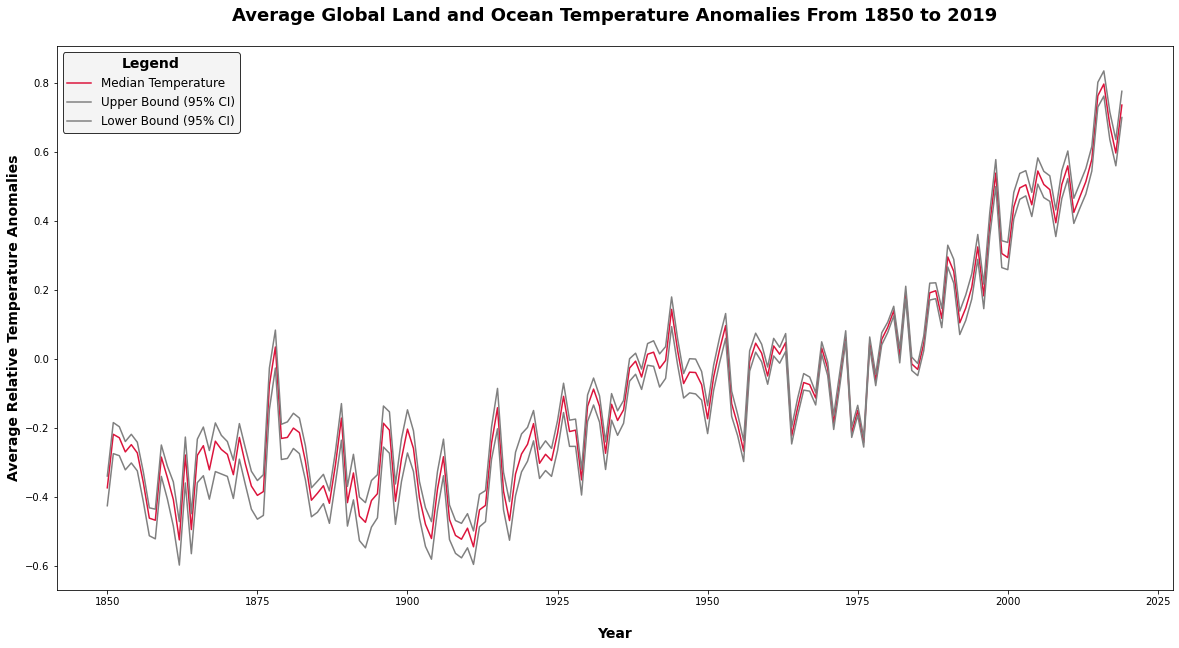

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

data = global_temp_df[global_temp_df["Entity"] == "Global"].drop(["Entity", "Code"], axis=1)

avg = data["Median temperature anomaly from 1961-1990 average"]
upper = data["Upper bound (95% CI)"]
lower = data["Lower bound (95% CI)"]

ax.plot(avg, color="#DC143C", label="Median Temperature")
ax.plot(upper, color="grey", label="Upper Bound (95% CI)")
ax.plot(lower, color="grey", label="Lower Bound (95% CI)")

ax.set_ylabel("Average Relative Temperature Anomalies",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("Year",
              fontdict={"size": 14,
                        "weight": "bold"},
              labelpad=20)

ax.set_title("Average Global Land and Ocean Temperature Anomalies From 1850 to 2019",
             fontdict={"size": 18,
                        "weight": "bold"},
             pad=25);

leg = ax.legend(prop={'size': 12}, frameon=True)
leg.set_title('Legend', prop={'size': 14, 'weight': 'bold'})
leg.get_frame().set_color('#F2F2F2')
leg.get_frame().set_edgecolor('#000000')

## Who is responsible for the CO2 emissions?

## How can we reduce CO2 emissions?